#Clustering Example using the Wine Dataset from UCI ML Repository
![Clustering Image](http://sid.cps.unizar.es/SEMANTICWEB/GENIE/GENIE_files/clustering.jpg)

In [2]:
#Use this if notebook cant import libraries 
import sys
sys.path.append('/usr/local/lib/python3.4/dist-packages')

*Import Libraries*

In [19]:
%matplotlib inline
import matplotlib
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from pylab import plot,show
from numpy import vstack,array
from numpy.random import rand
from scipy.cluster.vq import kmeans,vq
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [5]:
winePD =  pd.io.parsers.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data')

In [6]:
print (winePD.head()) # check if everything is in place
data = winePD.as_matrix()

   1  14.23  1.71  2.43  15.6  127   2.8  3.06   .28  2.29  5.64  1.04  3.92  \
0  1  13.20  1.78  2.14  11.2  100  2.65  2.76  0.26  1.28  4.38  1.05  3.40   
1  1  13.16  2.36  2.67  18.6  101  2.80  3.24  0.30  2.81  5.68  1.03  3.17   
2  1  14.37  1.95  2.50  16.8  113  3.85  3.49  0.24  2.18  7.80  0.86  3.45   
3  1  13.24  2.59  2.87  21.0  118  2.80  2.69  0.39  1.82  4.32  1.04  2.93   
4  1  14.20  1.76  2.45  15.2  112  3.27  3.39  0.34  1.97  6.75  1.05  2.85   

   1065  
0  1050  
1  1185  
2  1480  
3   735  
4  1450  


In [10]:
classLabelsKnown = np.asarray(data[:,0], 'i') 
classLabelsKnown -= 1 # get the labels start from 0

In [11]:
# get all the data but not the class labels
DataToCluster = data[:,1::]

In [12]:
#computing K-Means with K = 3 (3 clusters)
kmeansModel = KMeans(init='random', n_clusters=3, n_init=10)
kmeansModel.fit_predict(DataToCluster)
clusterResults = kmeansModel.labels_

In [13]:
## Let's check the results and try to compare with known labels
for i, clustLabel in enumerate(clusterResults):
    print("Cluster result: ", clustLabel, " Known labels: ",classLabelsKnown[i])

Cluster result:  1  Known labels:  0
Cluster result:  1  Known labels:  0
Cluster result:  1  Known labels:  0
Cluster result:  2  Known labels:  0
Cluster result:  1  Known labels:  0
Cluster result:  1  Known labels:  0
Cluster result:  1  Known labels:  0
Cluster result:  1  Known labels:  0
Cluster result:  1  Known labels:  0
Cluster result:  1  Known labels:  0
Cluster result:  1  Known labels:  0
Cluster result:  1  Known labels:  0
Cluster result:  1  Known labels:  0
Cluster result:  1  Known labels:  0
Cluster result:  1  Known labels:  0
Cluster result:  1  Known labels:  0
Cluster result:  1  Known labels:  0
Cluster result:  1  Known labels:  0
Cluster result:  2  Known labels:  0
Cluster result:  2  Known labels:  0
Cluster result:  2  Known labels:  0
Cluster result:  1  Known labels:  0
Cluster result:  1  Known labels:  0
Cluster result:  2  Known labels:  0
Cluster result:  2  Known labels:  0
Cluster result:  1  Known labels:  0
Cluster result:  1  Known labels:  0
C

**Analysing the labels from the output of the clustering is a bit arbitrary and subject to change if we run it again. So it requires caution a better way is to use PCA and visualise with the PC components on a 2D projection.  **

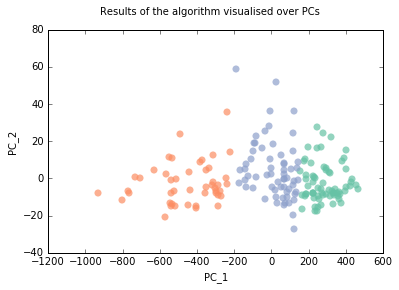

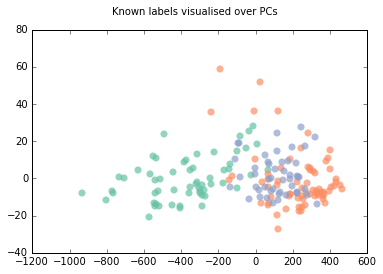

In [20]:
pca = PCA(n_components=2)

# We first fit a PCA model to the data
pca.fit(DataToCluster)

# have a look at the components directly if we can notice any interesting structure
projectedAxes = pca.transform(DataToCluster)

dataColumnsToVisualize = projectedAxes
#dataColumnsToVisualize = data
IDsForvisualization = clusterResults # to color the points according to the results of k-means
#IDsForvisualization = classLabelsKnown # to color the points according to the known labels 

columnIDToVisX = 0 # some variable to keep coind simple and flexible
columnIDToVisY = 1


plt.figure(1)
plt.suptitle('Results of the algorithm visualised over PCs')
plt.xlabel('PC_1')
plt.ylabel('PC_2')
# some plotting using numpy's logical indexing
plt.scatter(dataColumnsToVisualize[IDsForvisualization==0,columnIDToVisX], dataColumnsToVisualize[IDsForvisualization==0,columnIDToVisY], c = "#66c2a5", s = 50, alpha = 0.7, linewidth='0') # greenish
plt.scatter(dataColumnsToVisualize[IDsForvisualization==1,columnIDToVisX], dataColumnsToVisualize[IDsForvisualization==1,columnIDToVisY], c = "#fc8d62", s = 50, alpha = 0.7, linewidth='0') # orangish
plt.scatter(dataColumnsToVisualize[IDsForvisualization==2,columnIDToVisX], dataColumnsToVisualize[IDsForvisualization==2,columnIDToVisY], c = "#8da0cb", s = 50, alpha = 0.7, linewidth='0') # blueish
plt.show()

IDsForvisualization = classLabelsKnown

plt.figure(2)
plt.suptitle('Known labels visualised over PCs')
plt.scatter(dataColumnsToVisualize[IDsForvisualization==0,columnIDToVisX], dataColumnsToVisualize[IDsForvisualization==0,columnIDToVisY], c = "#66c2a5", s = 50, alpha = 0.7, linewidth='0')
plt.scatter(dataColumnsToVisualize[IDsForvisualization==1,columnIDToVisX], dataColumnsToVisualize[IDsForvisualization==1,columnIDToVisY], c = "#fc8d62", s = 50, alpha = 0.7, linewidth='0')
plt.scatter(dataColumnsToVisualize[IDsForvisualization==2,columnIDToVisX], dataColumnsToVisualize[IDsForvisualization==2,columnIDToVisY], c = "#8da0cb", s = 50, alpha = 0.7, linewidth='0')
plt.show()

We see several missclassifcations when comparing visually the results for the classification with the labels. Probably needs a better method and/or a better distance metric. 